In [7]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

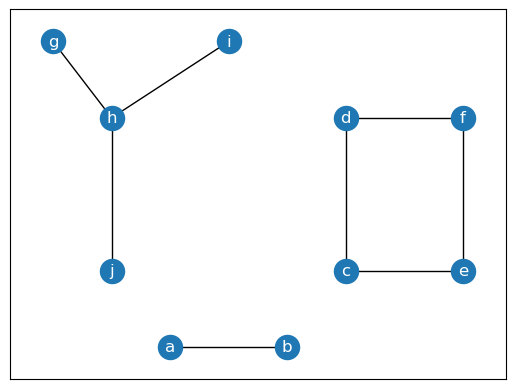

In [8]:
# Merging graph
graph = nx.Graph()
graph.add_edge("a", "b")

graph.add_edge("c", "d")
graph.add_edge("c", "e")
graph.add_edge("e", "f")
graph.add_edge("d", "f")

graph.add_edge("g", "h")
graph.add_edge("h", "i")
graph.add_edge("h", "j")

pos = {
    "a": (4, 1),
    "b": (6, 1),
    "c": (7, 2),
    "d": (7, 4),
    "e": (9, 2),
    "f": (9, 4),
    "g": (2, 5),
    "h": (3, 4),
    "i": (5, 5),
    "j": (3, 2),
}

nx.draw_networkx(
    graph,
    pos,
    arrows=False,
    with_labels=True,
    font_color="white"
)

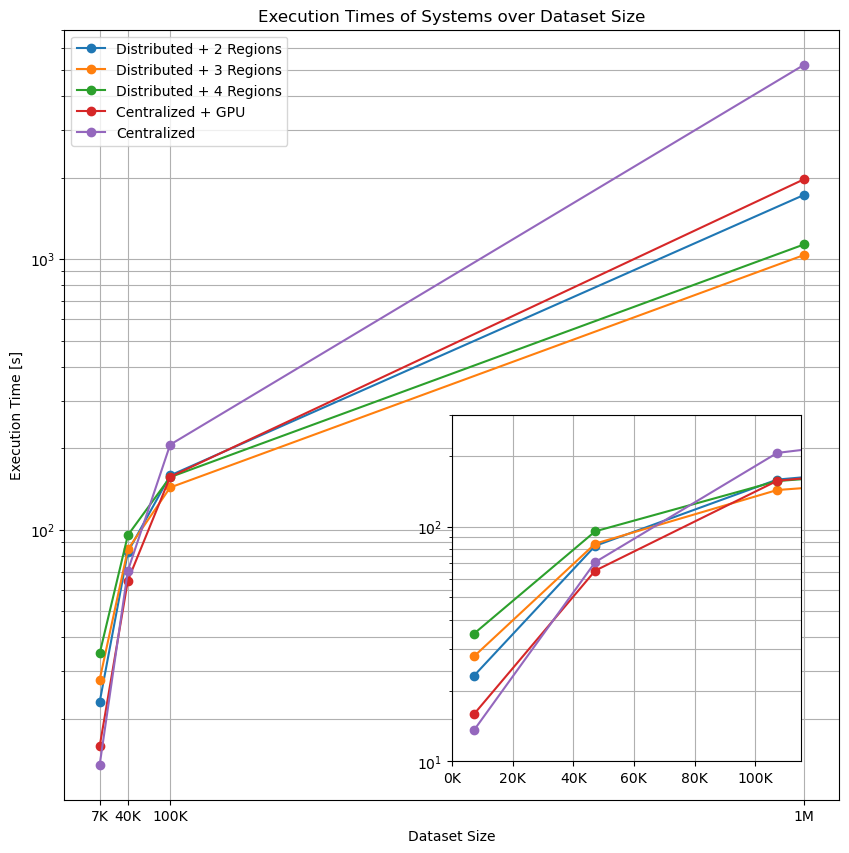

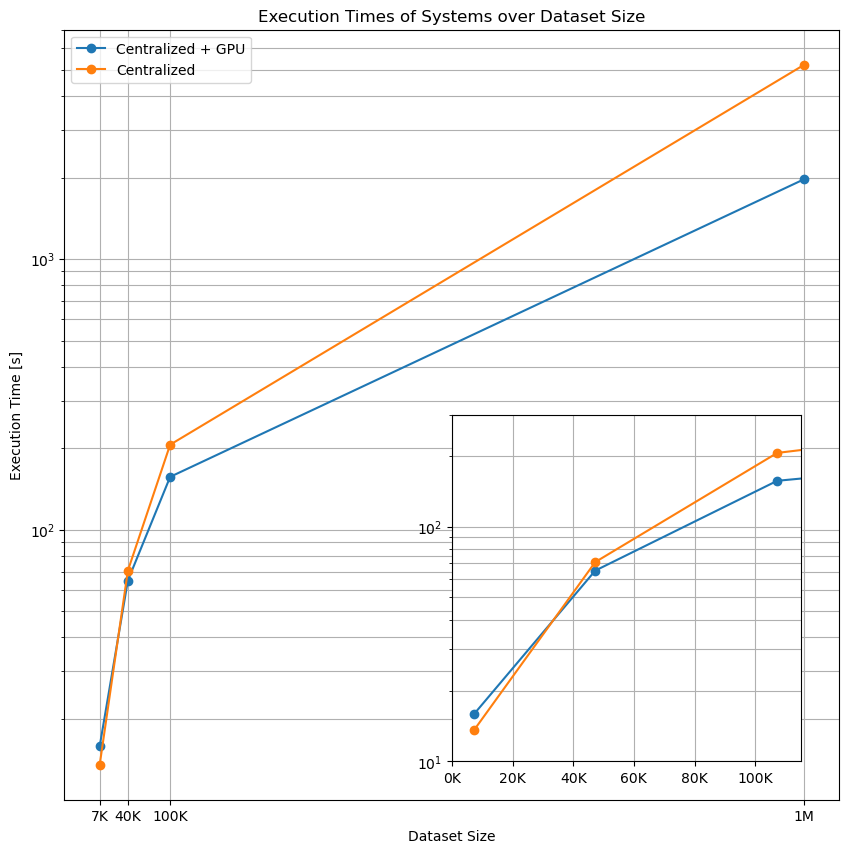

In [9]:
# Execution time graphs
datasets_sizes = np.array([7238, 47238, 107238, 1007238])
datasets_names = ["7K", "40K", "100K", "1M"]
runtimes_of_systems = np.array([
    [23122.256041, 82820.688232, 158701.36704800001, 1727272.187109],  # Distributed + 2 Regions
    [27958.406855999998, 84639.84526999999, 143256.990005, 1035691.780612],  # Distributed + 3 Regions
    [34947.968328, 95505.147732, 156457.11453299999, 1133342.5393239998],  # Distributed + 4 Regions
    [15863.765302, 64932.235587999996, 156826.075927, 1973213.3604690002],  # Centralized + GPU
    [13548.984075999999, 70609.205348, 206196.063407, 5224082.523896],  # Centralized
])  # ms
runtimes_of_systems /= 1000
systems = [
    "Distributed + 2 Regions",
    "Distributed + 3 Regions",
    "Distributed + 4 Regions",
    "Centralized + GPU",
    "Centralized"
]

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for runtimes_of_system, system in zip(runtimes_of_systems, systems):
    ax.plot(datasets_sizes, runtimes_of_system, marker="o", label=system)

ax_inset = ax.inset_axes(
    [0.5, 0.05, 0.45, 0.45],
    xlim=(0, 115000),
    ylim=(10, 300)
)
for runtimes_of_system in runtimes_of_systems:
    ax_inset.plot(datasets_sizes, runtimes_of_system, marker="o")

ax_inset.set_yscale("log")
ax_inset.xaxis.set_major_formatter(lambda x, _: f"{x / 1000:.0f}K")
ax_inset.grid(True, which="both")

ax.set_xticks(ticks=datasets_sizes, labels=datasets_names)
ax.set_xlabel("Dataset Size")
ax.set_ylabel("Execution Time [s]")
ax.set_title("Execution Times of Systems over Dataset Size")
ax.set_yscale("log")
ax.legend()
ax.grid(True, which="both")

plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for runtimes_of_system, system in zip(runtimes_of_systems[-2:], systems[-2:]):
    ax.plot(datasets_sizes, runtimes_of_system, marker="o", label=system)

ax_inset = ax.inset_axes(
    [0.5, 0.05, 0.45, 0.45],
    xlim=(0, 115000),
    ylim=(10, 300)
)
for runtimes_of_system in runtimes_of_systems[-2:]:
    ax_inset.plot(datasets_sizes, runtimes_of_system, marker="o")

ax_inset.set_yscale("log")
ax_inset.xaxis.set_major_formatter(lambda x, _: f"{x / 1000:.0f}K")
ax_inset.grid(True, which="both")

ax.set_xticks(ticks=datasets_sizes, labels=datasets_names)
ax.set_xlabel("Dataset Size")
ax.set_ylabel("Execution Time [s]")
ax.set_title("Execution Times of Systems over Dataset Size")
ax.set_yscale("log")
ax.legend()
ax.grid(True, which="both")

plt.show()